# Two-way ANOVA: A full analysis

### Outline:
The objectives for this assignment:

1. Motivate the use of two-way ANOVA through real data analysis examples.

2. Interpret the two-way ANOVA model, with and without interaction terms.

3. Construct and interpret interaction plots to visually assess the importance of an interaction term.

4. Conduct hypothesis tests to decide whether a two-way ANOVA interaction term is statistically significant.

5. Use the two-way ANOVA and ANCOVA models to answer research questions using real data.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

# Two-way ANOVA: a full analysis

In this lesson, we learn to answer our two-way ANOVA research questions through the analysis of real data. We will use the ereader data. The study that generated these data can be found here: [P.-C. Chang, S.-Y. Chou, K.-K. Shieh (2013). "Reading Performance and Visual Fatigue When Using Electronic Displays in Long-Duration Reading Tasks Under Various Lighting Conditions," Displays, Vol. 34,
pp. 208-214.](http://users.stat.ufl.edu/~winner/data/ereader1.txt)) 

Electronic paper display devices, such as the Amazon Kindle have changed the way that people read. But has it changed it for the better? In a 2013 study, titled "Reading Performance and Visual Fatigue When Using Electronic Displays in Long-Duration Reading Tasks Under Various Lighting Conditions", researchers set out to ask whether reading speed, a continuous variable, differed across different electronic paper displays. But, in addition, they were also interested in whether different lighting conditions impacted reading speed. As such, this experiment had one response with two different factors:

1. Device type: three different types.
    1. Sony PRS-700 with a 6-in. display, 800 􏰡 600 resolution; 
    2. Amazon Kindle DX with a 9.7-in. display, 1200 􏰡 824 resolution; and 
    3. iRex 1000S with a 10.2-in. display, 1024 􏰡 1280 resolution.


2. Lighting Condition: four different conditions (200Lx,500Lx, 1000Lx, 1500Lx), Lx = lux, one lumen per square meter


3. Reading Time: measured in seconds.

With these data, we might ask the following **research questions**:

1. Are the effects of device type significant? That is, is there any evidence that suggests that individuals read faster or slower based on the device that they are using?


2. Are the effects of lighting conditions significant? That is, is there any evidence that suggests that individuals read faster or slower based on the reading lighting conditions?


3. Do device type and lighting conditions *interact*? For example, Suppose that, on average, people can read for longer on device A than on device B, in low light. Is that trend the same in medium light, or bright light? If not, for example, if B is better than A in bright light, then type and lighting interact.

Through this entire analysis, let's set $\alpha = 0.05$. 

**First, let's read in the data, and store the appropriate variables as factors.**

In [92]:
library(tidyverse)
read = read.table("https://stat.ufl.edu/~winner/data/ereader1.dat", sep = "")
names(read) = c("device", "light", "time")
read$device = as_factor(read$device)
read$light = as.factor(read$light)
read$light = recode(read$light, "1" = "200Lx", "2" = "500Lx", "3" = "1000Lx", "4" = "1500Lx") 


summary(read)

 device    light         time       
 1:20   200Lx :15   Min.   : 543.8  
 2:20   500Lx :15   1st Qu.: 862.0  
 3:20   1000Lx:15   Median :1111.5  
        1500Lx:15   Mean   :1099.7  
                    3rd Qu.:1304.6  
                    Max.   :1797.2  

**Then, let's construct interaction plots, and visually assess whether interactions are present.**

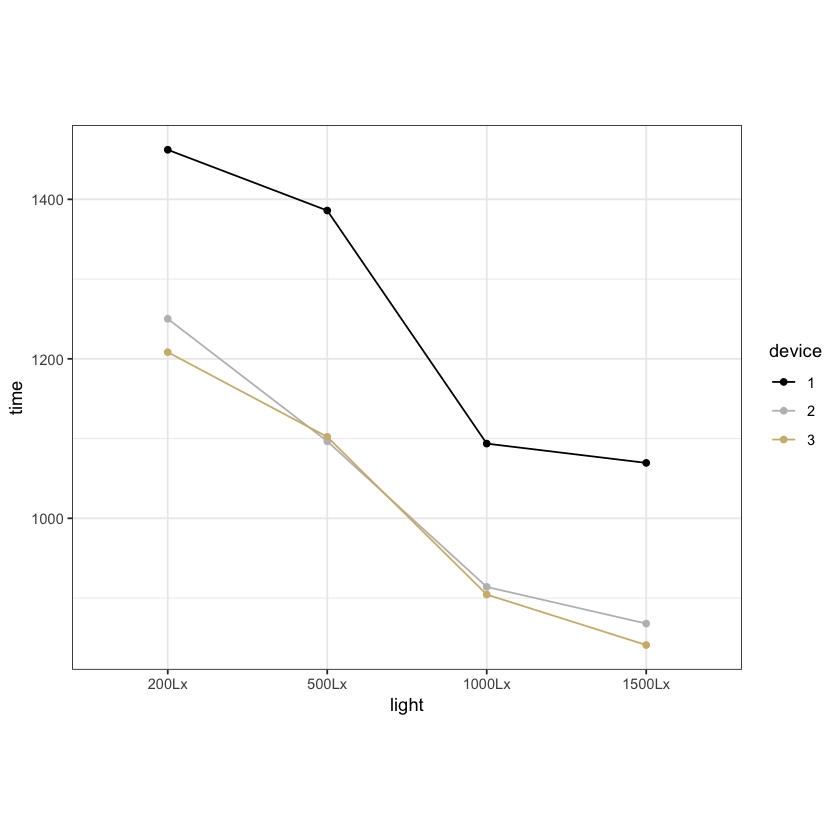

In [128]:
read %>% 
  ggplot() +
  aes(x = light, color = device, group = device, y = time) +
  stat_summary(fun.y = mean, geom = "point") +
  stat_summary(fun.y = mean, geom = "line") + 
  scale_color_manual(values=c("black", "grey","#CFB87C")) +
  theme_bw() + 
  coord_fixed(ratio=1/200)

In this plot, we see a few pieces of visual evidence that there are interactions, but that those interactions may or may not be statistically significant. For example, we see that, at 200Lx, reading time is longer for device two than device three, but that for 500Lx, reading time is longer for device three than two. However, the difference between the mean reading time for device types two and three seem small, and so it may just be an artifact of the sample data, and not a reflection of the population.

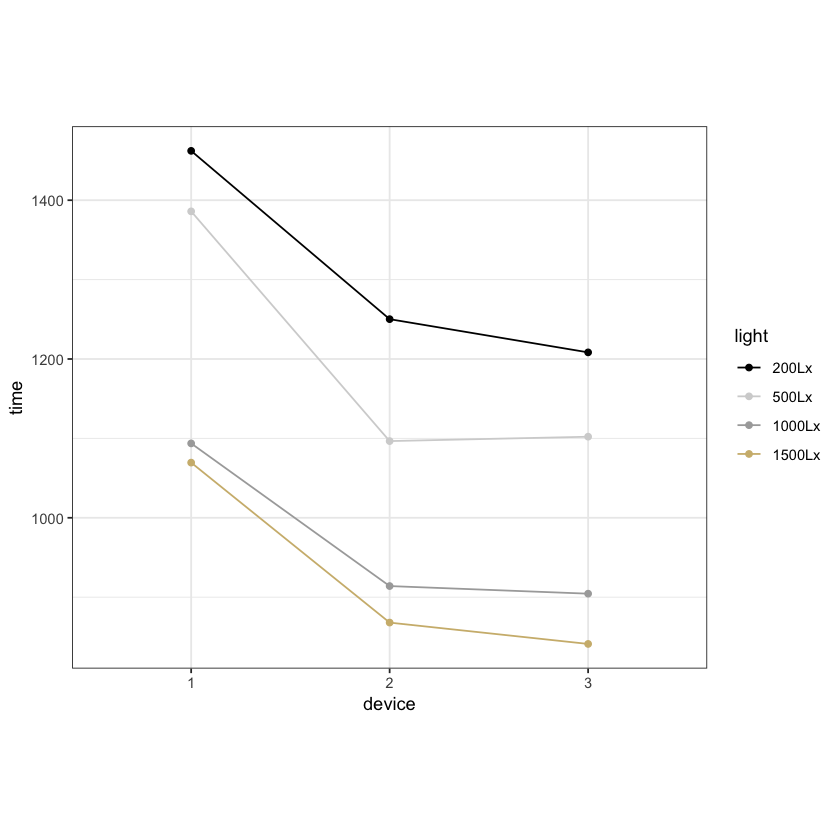

In [115]:
read %>% 
  ggplot() +
  aes(x = device, color = light, group = light, y = time) +
  stat_summary(fun.y = mean, geom = "point") +
  stat_summary(fun.y = mean, geom = "line") + 
  scale_color_manual(values=c("black", "lightgrey", "darkgrey","#CFB87C")) +
  theme_bw() + 
  coord_fixed(ratio=1/250)

This plot does not provide evidence of interactions between factors.

**Now, let's formally test for an interaction. We'll fit a model with an ineteraction, and one without, and conduct an F-test.**

In [129]:
twoway_interact = lm(time ~ device + light + device:light, data = read)
twoway = lm(time ~ device + light, data = read)
anova(twoway, twoway_interact)


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
54,3671746,NA,NA,NA,NA
48,3650203,6,21543.24,0.04721544,0.9995253


Here, the p-value, $0.99$, is larger than $\alpha$, and thus, we see no evidence of an interaction. So, we've answered our **research question #3**! Thus, we can proceed with model without interaction term.

In [119]:
summary(twoway)


Call:
lm(formula = time ~ device + light, data = read)

Residuals:
    Min      1Q  Median      3Q     Max 
-507.27 -197.74  -19.43  196.34  464.11 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1460.05      82.46  17.706  < 2e-16 ***
device2      -220.63      82.46  -2.676 0.009854 ** 
device3      -238.83      82.46  -2.896 0.005442 ** 
light500Lx   -112.00      95.22  -1.176 0.244650    
light1000Lx  -336.20      95.22  -3.531 0.000856 ***
light1500Lx  -380.70      95.22  -3.998 0.000195 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 260.8 on 54 degrees of freedom
Multiple R-squared:  0.3734,	Adjusted R-squared:  0.3154 
F-statistic: 6.436 on 5 and 54 DF,  p-value: 9.296e-05


**Let's focus on research question #1 from above: Are the effects of device type significant? That is, is there any evidence that suggests that individuals read faster or slower based on the device that they are using**

**Before we interpret this model with respect to this research question, let's decide whether the differences that the model reports are statisticall significant. We will investigate this question using Bonferroni post hoc comparisons, because we already have the data in hand. That means we will want to make p-value adjustments.** 

In [125]:
library(lsmeans)
pairs(lsmeans(twoway, "device"), adjust = "bonferroni")

 contrast estimate   SE df t.ratio p.value
 1 - 2       220.6 82.5 54 2.676   0.0296 
 1 - 3       238.8 82.5 54 2.896   0.0163 
 2 - 3        18.2 82.5 54 0.221   1.0000 

Results are averaged over the levels of: light 
P value adjustment: bonferroni method for 3 tests 

**Interpret the results of these post hoc tests**.

Recall that the device type variable included three different types:
    1. Sony PRS-700 with a 6-in. display, 800 􏰡 600 resolution; 
    2. Amazon Kindle DX with a 9.7-in. display, 1200 􏰡 824 resolution; and 
    3. iRex 1000S with a 10.2-in. display, 1024 􏰡 1280 resolution.


1. The difference with respect to mean reading time between the Sony PRS 700 and the Amazon Kindle is statistically significant, even after the Bonferroni correction ($p \approx 0.03$). So, we can conclude that there is a difference between these two devices, and that, on average, holding lighting conditions constant, one can read for 220.6 seconds longer with the Sony device. Whether or not this amount of time is practically significant will depend on the views of the stakeholders involved (e.g., the researchers, technology companies, and readers).

2. The difference with respect to tmean reading time between the Sony PRS 700 and the iRex 1000S is statistically significant. So, we can conclude that there is a difference between these two devices, and that, on average, holding lighting conditions constant, one can read for 238.8 seconds longer with the Sony device. Again, whether or not this amount of time is practically significant will depend on the views of the stakeholders involved (e.g., the researchers, technology companies, and readers).

3. The difference with respect to tmean reading time between the Amazon Kindle and the iRex 1000S is not statistically significant. So, we cannot conclude that mean reading time is better for one of these devices. 

As an exercise, consider **research question #2** from above: Are the effects of lighting conditions significant? That is, is there any evidence that suggests that individuals read faster or slower based on the reading lighting conditions? Recall that there were four different conditions: 200Lx, 500Lx, 1000Lx, 1500Lx, and that Lx = lux, one lumen per square meter. 



In [126]:
library(lsmeans)
pairs(lsmeans(twoway, "light"), adjust = "bonferroni")

 contrast        estimate   SE df t.ratio p.value
 200Lx - 500Lx      112.0 95.2 54 1.176   1.0000 
 200Lx - 1000Lx     336.2 95.2 54 3.531   0.0051 
 200Lx - 1500Lx     380.7 95.2 54 3.998   0.0012 
 500Lx - 1000Lx     224.2 95.2 54 2.355   0.1332 
 500Lx - 1500Lx     268.7 95.2 54 2.822   0.0400 
 1000Lx - 1500Lx     44.5 95.2 54 0.467   1.0000 

Results are averaged over the levels of: device 
P value adjustment: bonferroni method for 6 tests 